In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

import wrangle as w
import explore as e
import env
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50790 entries, 0 to 50789
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    50790 non-null  int64  
 1   bathrooms   50790 non-null  float64
 2   sq_feet     50790 non-null  int64  
 3   tax_value   50790 non-null  int64  
 4   year_built  50790 non-null  int64  
 5   tax_amount  50790 non-null  float64
 6   fips        50790 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.7 MB


In [4]:
train, validate, test = w.split_data(df)

In [5]:
train.head(3)

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
8096,3,2.0,1605,206483,1983,2293.70,6111
45007,2,1.0,1521,110048,1970,1530.47,6037
43774,3,2.0,1678,82423,1956,1175.02,6059


In [6]:
x_train = train[['bedrooms', 'bathrooms', 'sq_feet', 'fips']]
y_train = train[['tax_value']]

x_validate = validate[['bedrooms', 'bathrooms', 'sq_feet']]
y_validate = validate[['tax_value']]

x_test = test[['bedrooms', 'bathrooms', 'sq_feet']]
y_test = test[['tax_value']]

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28442 entries, 8096 to 45413
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   28442 non-null  int64  
 1   bathrooms  28442 non-null  float64
 2   sq_feet    28442 non-null  int64  
 3   fips       28442 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 MB


In [8]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28442 entries, 8096 to 45413
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tax_value  28442 non-null  int64
dtypes: int64(1)
memory usage: 444.4 KB


# Stat analysis

In [9]:
corr, p = stats.pearsonr(x_train['bedrooms'], y_train)
print(f'corr = {float(corr):.4f}')
print(f'p    = {p:.4f}')

corr = 0.2747
p    = 0.0000


In [10]:
corr

array([0.2746855350581237], dtype=object)

In [11]:
corr2, p2 = stats.pearsonr(x_train['bathrooms'], y_train)
print(f'corr = {float(corr2):.4f}')
print(f'p    = {p2:.4f}')

corr = 0.5052
p    = 0.0000


In [12]:
corr3, p3 = stats.pearsonr(x_train['sq_feet'], y_train)
print(f'corr = {float(corr3):.4f}')
print(f'p    = {p3:.4f}')

corr = 0.5762
p    = 0.0000


In [13]:
corr4, p4 = stats.pearsonr(x_train['fips'], y_train)
print(f'corr = {float(corr4):.4f}')
print(f'p    = {p4:.4f}')

corr = 0.0965
p    = 0.0000


In [14]:
#plt.hist(train['bedrooms'])

Text(0.5, 1.0, 'Bedrooms VS Tax Value')

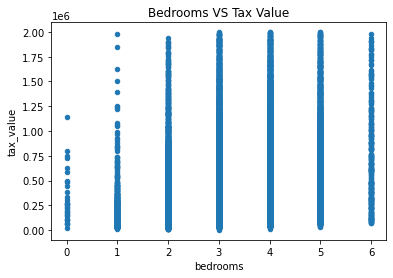

In [15]:
train.plot.scatter('bedrooms','tax_value')
plt.title('Bedrooms VS Tax Value')

In [16]:
#sns.swarmplot(x='bedrooms', y='tax_value', data=train)

Text(0.5, 1.0, 'Bathrooms VS Tax Value')

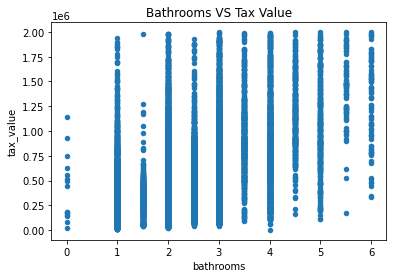

In [17]:
train.plot.scatter('bathrooms','tax_value')
plt.title('Bathrooms VS Tax Value')

Text(0.5, 1.0, 'Square Feet VS Tax Value')

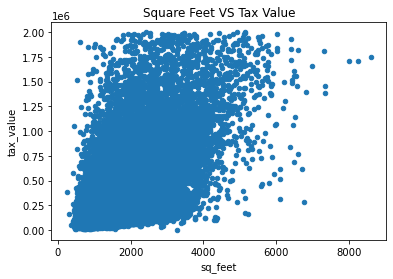

In [18]:
train.plot.scatter('sq_feet','tax_value')
plt.title('Square Feet VS Tax Value')

KeyboardInterrupt: 

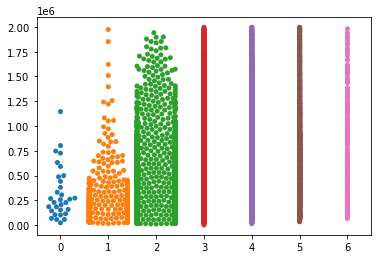

In [19]:
sns.swarmplot(x='bedrooms', y='tax_value', data=train)

In [ ]:
train_viz = train.sample(frac=0.04, replace=True, random_state=123)

In [ ]:
train_viz.info()

In [ ]:
sns.swarmplot(x='bedrooms', y='tax_value', data=train_viz, size=3)

In [ ]:
sns.violinplot(x='bedrooms', y='tax_value', data=train_viz, scale='count', scale_hue=False)

In [ ]:
train_viz.plot.scatter('bedrooms','tax_value')
plt.title('Bedrooms VS Tax Value')

In [ ]:
train_viz.plot.scatter('bathrooms','tax_value')
plt.title('Bathrooms VS Tax Value')

In [ ]:
train_viz.plot.scatter('sq_feet','tax_value')
plt.title('Square Feet VS Tax Value')

In [ ]:
sns.stripplot(x='bedrooms', y='tax_value', data=train_viz, size=3)

In [ ]:
def get_strip(string):
    train_viz = train.sample(frac=0.04, replace=True, random_state=777)
    sns.stripplot(x=string, y='tax_value', data=train_viz, size=3)
    plt.show()
    #sns.stripplot(x='bathrooms', y='tax_value', data=train_viz, size=3)
    #plt.show()

In [ ]:
get_strip('bedrooms')

In [ ]:
get_strip('bathrooms')

In [ ]:
def get_scatter_sq_feet():
    train_viz.plot.scatter('sq_feet','tax_value')
    plt.title('Square Feet vs Tax Value')

In [ ]:
get_scatter_sq_feet()

In [ ]:
get_strip('fips')

In [ ]:
print(train_viz['fips'])

In [20]:
def get_fips():
    #train_viz = train.sample(frac=0.04, replace=True, random_state=777)
    #fipsname = map(train_viz['fips'],['LA', 'Orange','Something else'])
    sns.stripplot(x=train['fips'], y='tax_value', data=train, size=3)
    plt.show()
    print('6037 = Los Angeles County\n6059 = Orange County\n6111 = Ventura County')

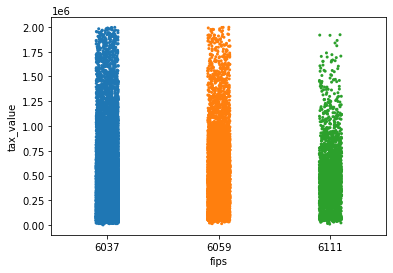

6037 = Los Angeles County
6059 = Orange County
6111 = Ventura County


In [21]:
get_fips()

6037 = Los Angeles County
6059 = Orange County
6111 = Ventura County

<AxesSubplot:>

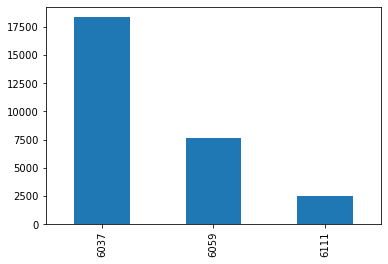

In [26]:
pd.value_counts(train['fips']).plot.bar()

<BarContainer object of 3 artists>

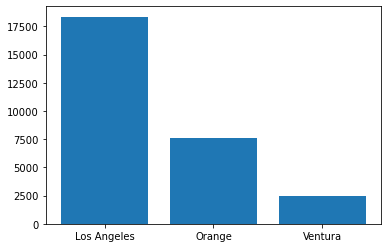

In [31]:
plt.bar(['Los Angeles','Orange','Ventura'], pd.value_counts(train['fips']))